<a href="https://colab.research.google.com/github/Mayandza/Projet/blob/main/Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


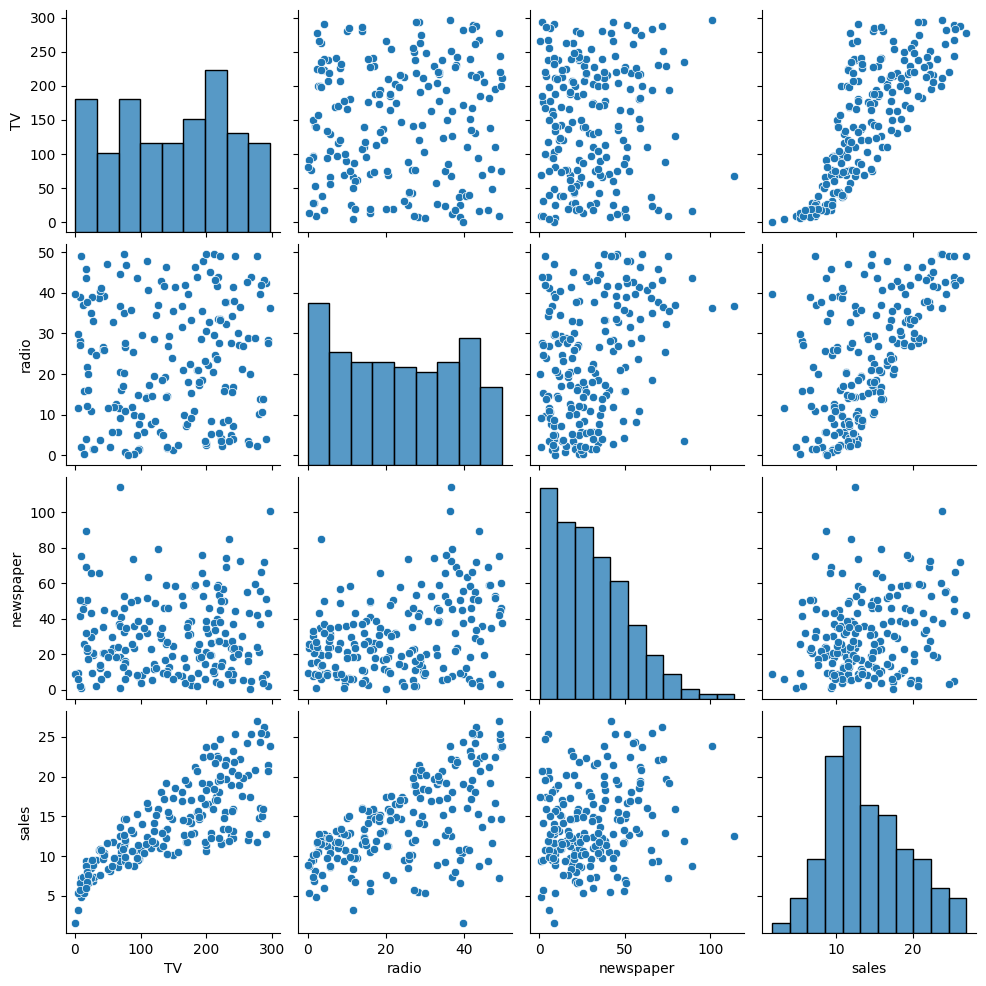

In [6]:
sns.pairplot(df)

<Axes: xlabel='sales', ylabel='TV'>

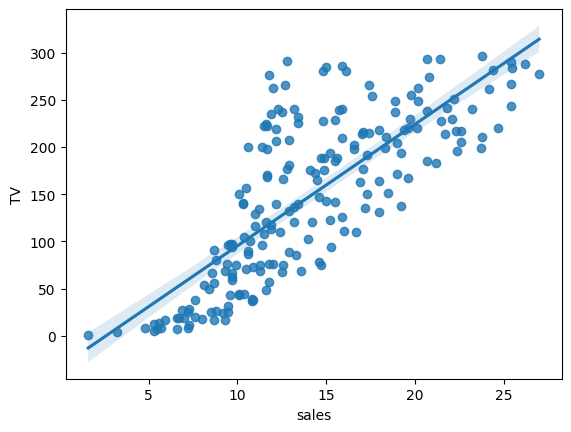

In [9]:
# relation entre tv et ventes

sns.regplot(df, x='sales', y='TV')

<Axes: xlabel='sales', ylabel='radio'>

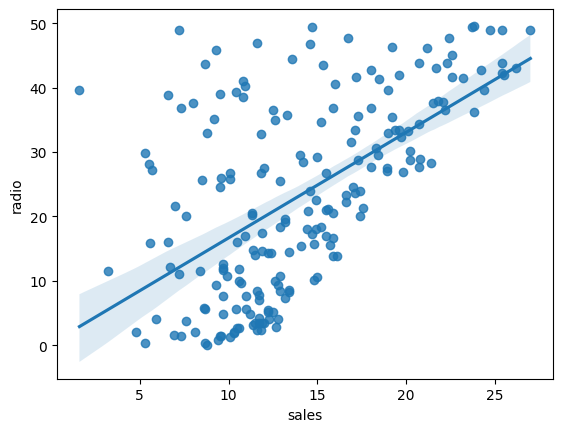

In [10]:
# relation entre Radio et ventes

sns.regplot(df, x='sales', y='radio')

<Axes: xlabel='sales', ylabel='newspaper'>

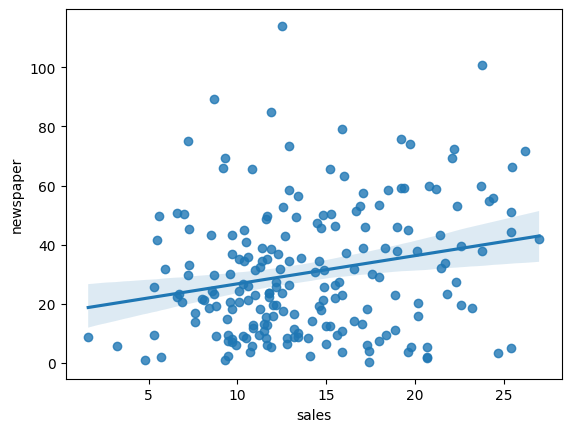

In [11]:
# relation entre newspaper et ventes

sns.regplot(df, x='sales', y='newspaper')

In [13]:
### separation des données en features et en labels

X = df.drop('sales', axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [15]:
y = df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [19]:
## fractionement des données
## la decomposition

from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [25]:
len(X_train)

140

In [24]:
len(X_test)

60

In [26]:
len(y_train)

140

In [27]:
len(y_test)

60

In [28]:
### importation du model

from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
test_predict = model.predict(X_test)

In [32]:
X_test.head()

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
df['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

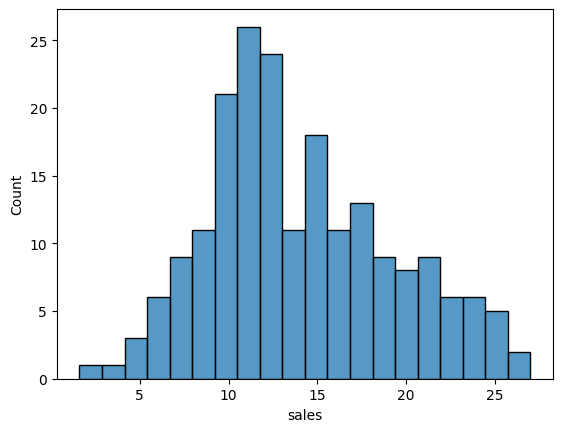

In [42]:
sns.histplot(df, x='sales', bins=20)

In [43]:
mean_absolute_error(y_test, test_predict)

1.213745773614481

In [47]:
np.sqrt(mean_squared_error(y_test, test_predict))

1.5161519375993884